# Example 4 : Plotting with Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) is a Python package designed for vizualizing data using different statistical methods. Anything that seaborn can do, you can do with matplotlib and a little bit of numpy or scipy. That being said, you should not think of seaborn as an "alternative" to matplotlib (especially since seaborn is built on top of matplotlib). Rather, think of seaborn as a collection of "plotting macros" that make certain types of plots much easier to do.

In this notebook, I will run through a couple of different plotting functions in seaborn just to give you some ideas of what kinds of plots you can make of MUSIC data. First, let's do our standard first imports and some things to make the plots a little nicer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 # bigger figures

# Use more REVTEX-esque fonts
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"

Let's grab our ROOT data and setup the dataframe.

In [2]:
import uproot

In [3]:
file = uproot.open("test_music_data.root")
tree = file['tree']
branches = tree.arrays()

# set up dictionary
dict_branches = {}
# strip0 first
dict_branches.update({'s0':branches['strip0'][branches['seg'] == 1]})
# segmented anode, left first then right
for i in range(1,17):
    dict_branches.update({'s%iL' % i : branches['edepl'][branches['seg'] == i]})
    dict_branches.update({'s%iR' % i  : branches['edepr'][branches['seg'] == i]})
# strip17
dict_branches.update({'s17':branches['strip17'][branches['seg'] == 1]})
# grid last
dict_branches.update({'grid':branches['grid'][branches['seg'] == 1]})

# dataframe
df = pd.DataFrame(dict_branches)

df

,s0,s1L,s1R,s2L,s2R,s3L,s3R,s4L,s4R,s5L,...,s13L,s13R,s14L,s14R,s15L,s15R,s16L,s16R,s17,grid
0,1003.0,366.0,50.0,35.0,366.0,387.0,33.0,42.0,335.0,377.0,...,463.0,34.0,35.0,457.0,462.0,33.0,49.0,445.0,402.0,1522.0
1,1091.0,356.0,41.0,37.0,366.0,376.0,32.0,36.0,361.0,368.0,...,429.0,37.0,41.0,522.0,470.0,32.0,40.0,482.0,380.0,1468.0
2,1083.0,364.0,62.0,36.0,359.0,371.0,35.0,38.0,372.0,365.0,...,447.0,37.0,38.0,501.0,471.0,32.0,39.0,483.0,402.0,1421.0
3,1002.0,362.0,43.0,37.0,341.0,359.0,35.0,37.0,380.0,411.0,...,436.0,36.0,37.0,442.0,470.0,33.0,37.0,467.0,400.0,1450.0
4,1015.0,352.0,41.0,37.0,361.0,377.0,33.0,39.0,382.0,409.0,...,444.0,33.0,37.0,441.0,442.0,34.0,43.0,463.0,366.0,1487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267824,1040.0,338.0,63.0,36.0,360.0,381.0,37.0,36.0,377.0,419.0,...,425.0,39.0,33.0,434.0,419.0,35.0,39.0,459.0,403.0,1592.0
267825,969.0,325.0,41.0,36.0,360.0,387.0,35.0,36.0,363.0,406.0,...,437.0,38.0,36.0,460.0,448.0,34.0,38.0,479.0,384.0,1559.0
267826,958.0,327.0,49.0,40.0,355.0,362.0,32.0,37.0,361.0,401.0,...,423.0,36.0,34.0,447.0,420.0,36.0,46.0,451.0,398.0,1439.0
267827,1006.0,344.0,39.0,41.0,330.0,395.0,35.0,36.0,364.0,419.0,...,436.0,35.0,39.0,459.0,456.0,33.0,53.0,389.0,393.0,1524.0


## 1D Histograms

Seaborn has a built-in function to plot 1D histograms. With most seaborn functions, there is an expectation to work with data already in a dataframe or numpy array. Then, once you tell seaborn what dataframe/ndarray you want to pull data from you can pick which column to plot using the column name. Let's plot a 1D histogram of the Frisch grid.

In [4]:
import seaborn as sns

<Axes: xlabel='grid', ylabel='Count'>

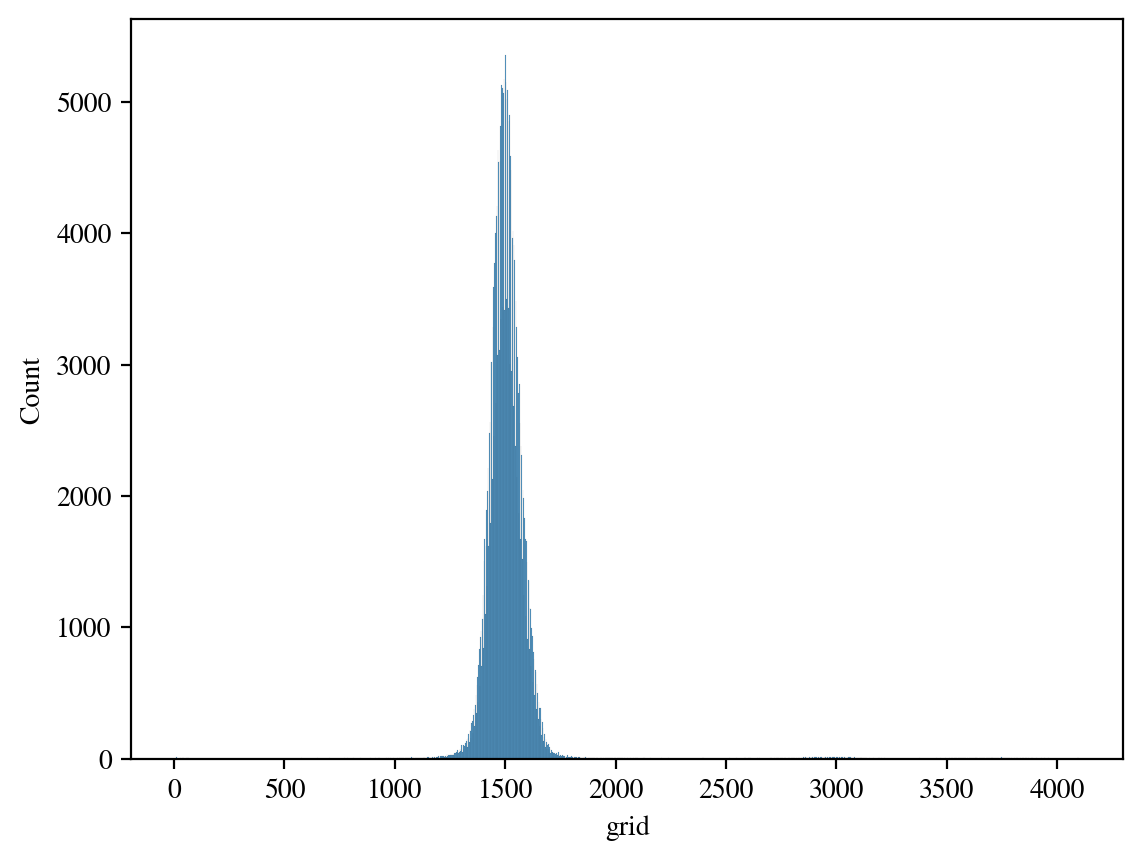

In [11]:
sns.histplot(data=df, x='grid')

If we want to use a log scale the histplot function has arguments for this. We can give two booleans, the first for the x-axis the second for the y-axis. So, if we only want to plot the y-axis on a log scale we can do:

<Axes: xlabel='grid', ylabel='Count'>

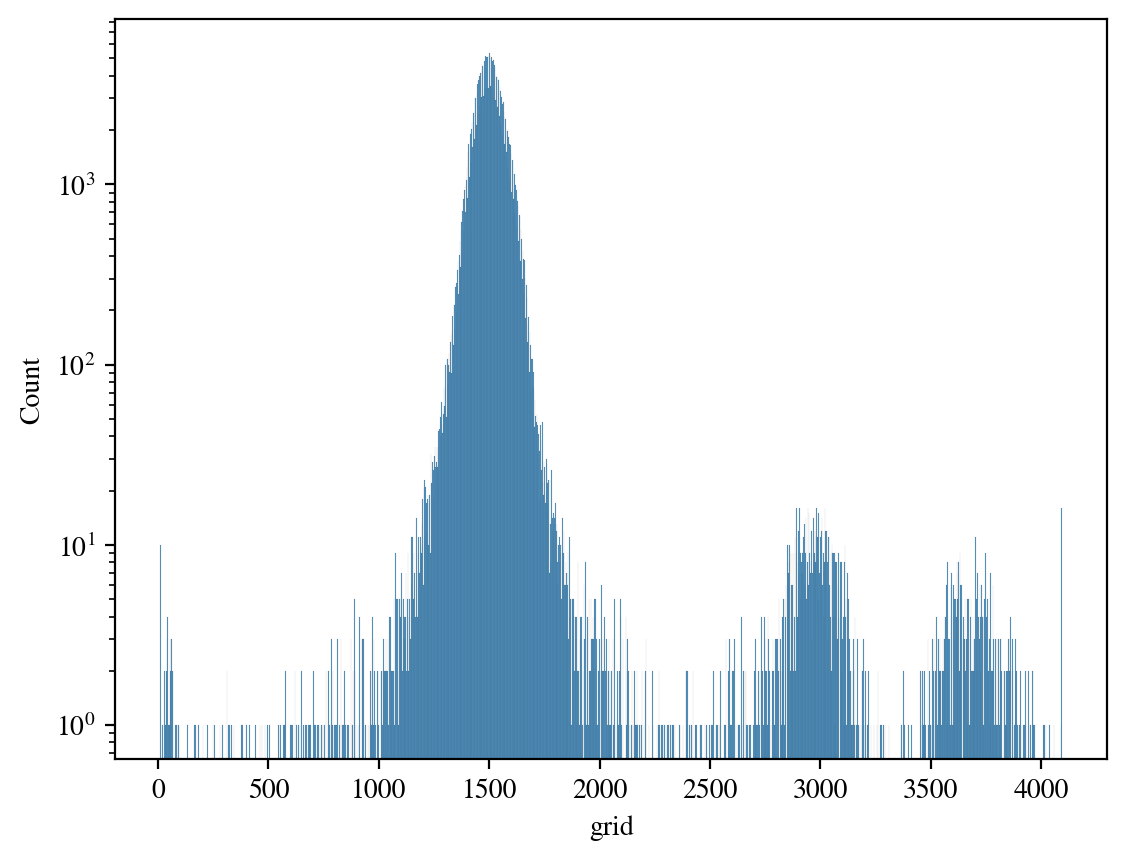

In [12]:
sns.histplot(data=df, x='grid', log_scale={False,True})

We can see seaborn has determined the number of bins to use. By default seaborn uses the 'auto' method from numpy.histogram_bin_edges() to determine the bin width and number of bins to use. However, just like with plt.hist() in seaborn you can freely choose to either specifiy the number of bins or use any other method from numpy.histogram_bin_edges().

In addition to the function arguments, it should be noted seaborn functions return matplotlib objects (often a patch or axes object). So, we can add in some matplotlib to add things like titles or save the figure etc... Here's an example with more of the options used.

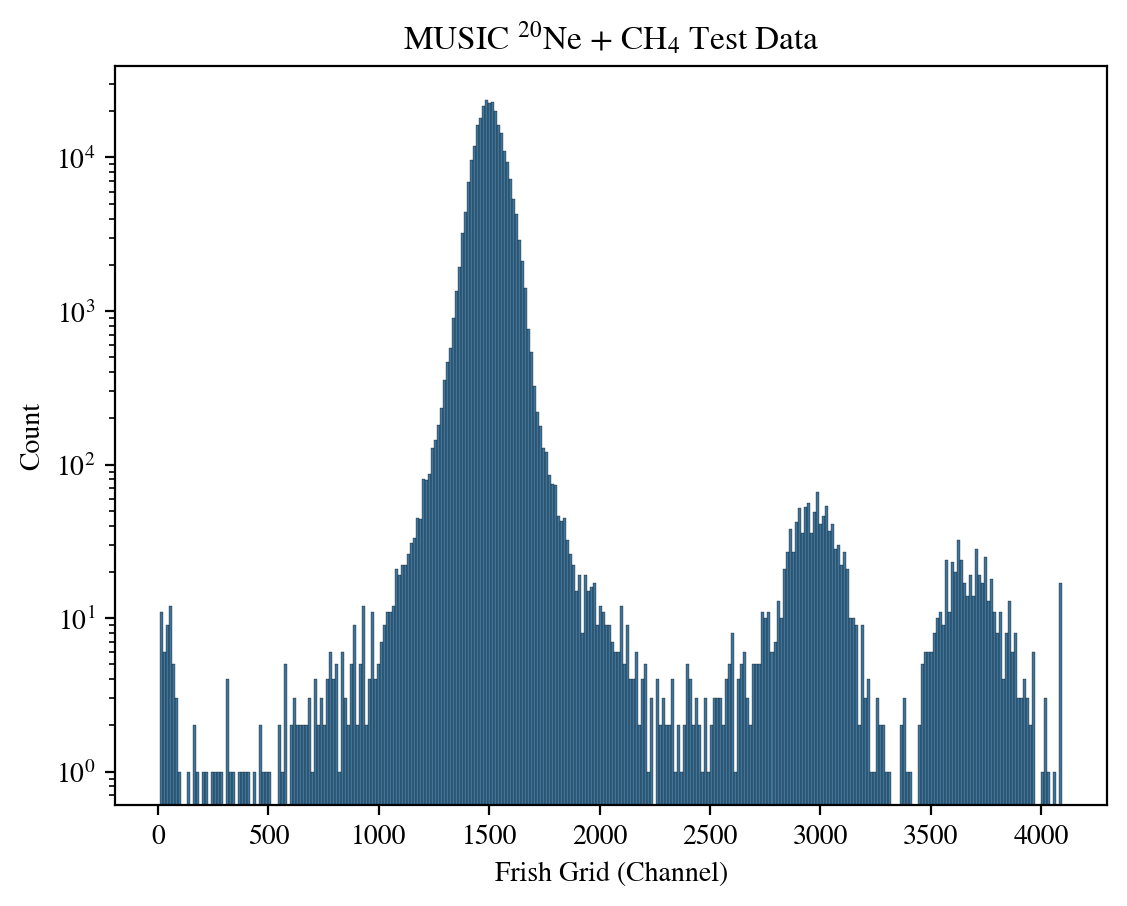

In [21]:
plt.title(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Data')
ax = sns.histplot(data=df, x='grid',
                  bins=300,
                  color='xkcd:prussian blue',
                  log_scale={False,True})
ax.set_xlabel('Frish Grid (Channel)')

plt.show()

## 2D Histograms

In seaborn, you can use the same function to plot a 2D histogram by passing a column name to the y data argument. We also have options to set the range, change the normalization, and add a colorbar as well.

In [23]:
from matplotlib.colors import LogNorm

<Axes: xlabel='grid', ylabel='s0'>

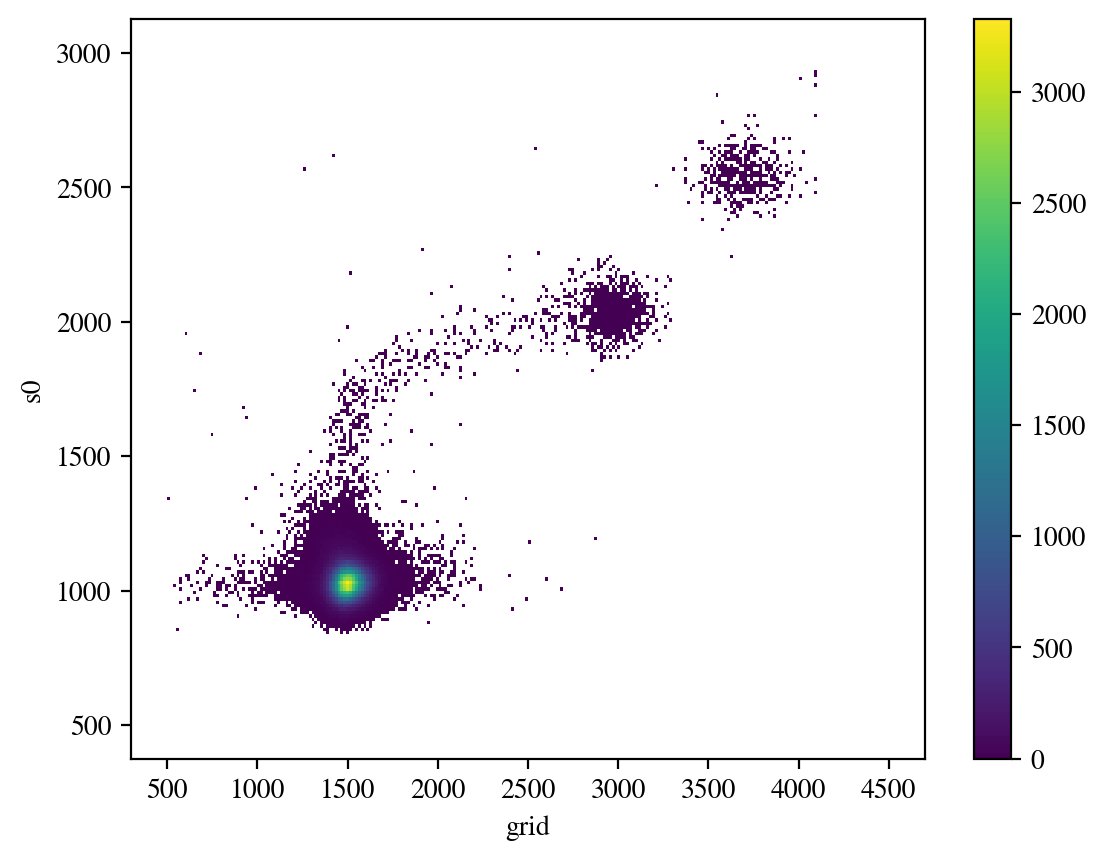

In [43]:
sns.histplot(data=df, x='grid', y='s0',
             bins=(250,200),
             binrange=[[500,4500],[500,3000]],
             cbar=True,
             cmap='viridis',
             hue_norm=LogNorm())

## KDE plots

## Joint plots

## Pair plots

## Ridge plots